# Working with Datasets and Exploring Pandas and Plots

This exercise discovers an extensive dataset on the subject of traffic on German roads provided by the BASt. It holds detailed numbers of cars, trucks and other vehicle groups passing more than 1,500 automatic counting stations. This dataset records for each counting station are provided on an hourly basis and they reach back to the year 2003.

We will explore some new insights about the data given.

### Import Libraries and Download data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# download file from http://www.bast.de/videos/2016_A_S.zip
df = pd.read_csv('2016_A_S.txt', sep=';')

colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

### Linechart: Car traffic at one station

In [6]:
df = df[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df.columns = ['nr', 'land', 'cars_r1', 'cars_r2', 'date', 'hour']

# convert values in 'date' column to DateTime
df.loc[df.hour == 24, 'hour'] = 0
df['date'] =  pd.to_datetime( df['date'].astype(str) + '-' + df['hour'].astype(str), format='%y%m%d-%H')


In [14]:
df.head()

,nr,land,cars_r1,cars_r2,date,hour,sum
0,4382,16,16,10,2016-01-01 01:00:00,1,26
1,4382,16,32,26,2016-01-01 02:00:00,2,58
2,4382,16,17,31,2016-01-01 03:00:00,3,48
3,4382,16,11,24,2016-01-01 04:00:00,4,35
4,4382,16,16,21,2016-01-01 05:00:00,5,37


# Task 1: Plot linechart of number of cars_r1 and cars_r2 vs date with different colors and legend.

Using the station and station_days. Analyze what station and station_days represent and how they should be used. It is pretty straight forward.

In [90]:
grouped_by_name = df.groupby(['nr'])

number = 1177
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.Grouper(freq='D')])[['cars_r1', 'cars_r2']].sum().reset_index()
station_days = station_days.set_index('date')
station_days

,cars_r1,cars_r2
date,,
2016-01-01,3296,2511
2016-01-02,4765,7487
2016-01-03,3809,5534
2016-01-04,4315,3598
2016-01-05,4206,3188
2016-01-06,4300,2968
2016-01-07,4010,2488
2016-01-08,5006,2798
2016-01-09,3770,2361


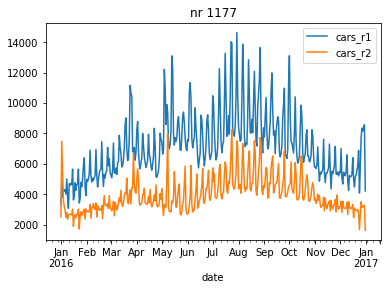

In [51]:
station_days.plot()
plt.title("nr 1177")
plt.show()

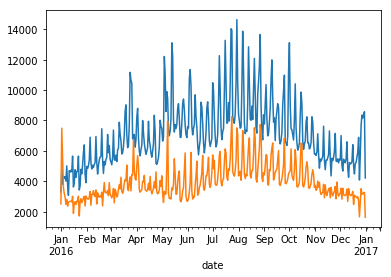

In [46]:
station_days['cars_r1'].plot()
station_days['cars_r2'].plot()

## Scatterplot: Top 3 busiest days per state

In [92]:
df_scatter = df
df_scatter['sum'] = df_scatter['cars_r1'] + df_scatter['cars_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.Grouper(freq='D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending=False)
df_clean = df_sorted.groupby(['land']).head(3)

df_clean.head()

,land,date,sum
2772,9,2016-07-29,18445463
2835,9,2016-09-30,18217294
2758,9,2016-07-15,17777895
1371,5,2016-09-30,12854101
1222,5,2016-05-04,12686419


# Task 2: Plot the different group of land vs date and show the 3 busiest day using the above dataframes generated.

You have to just write one line inside the for loop and plot.

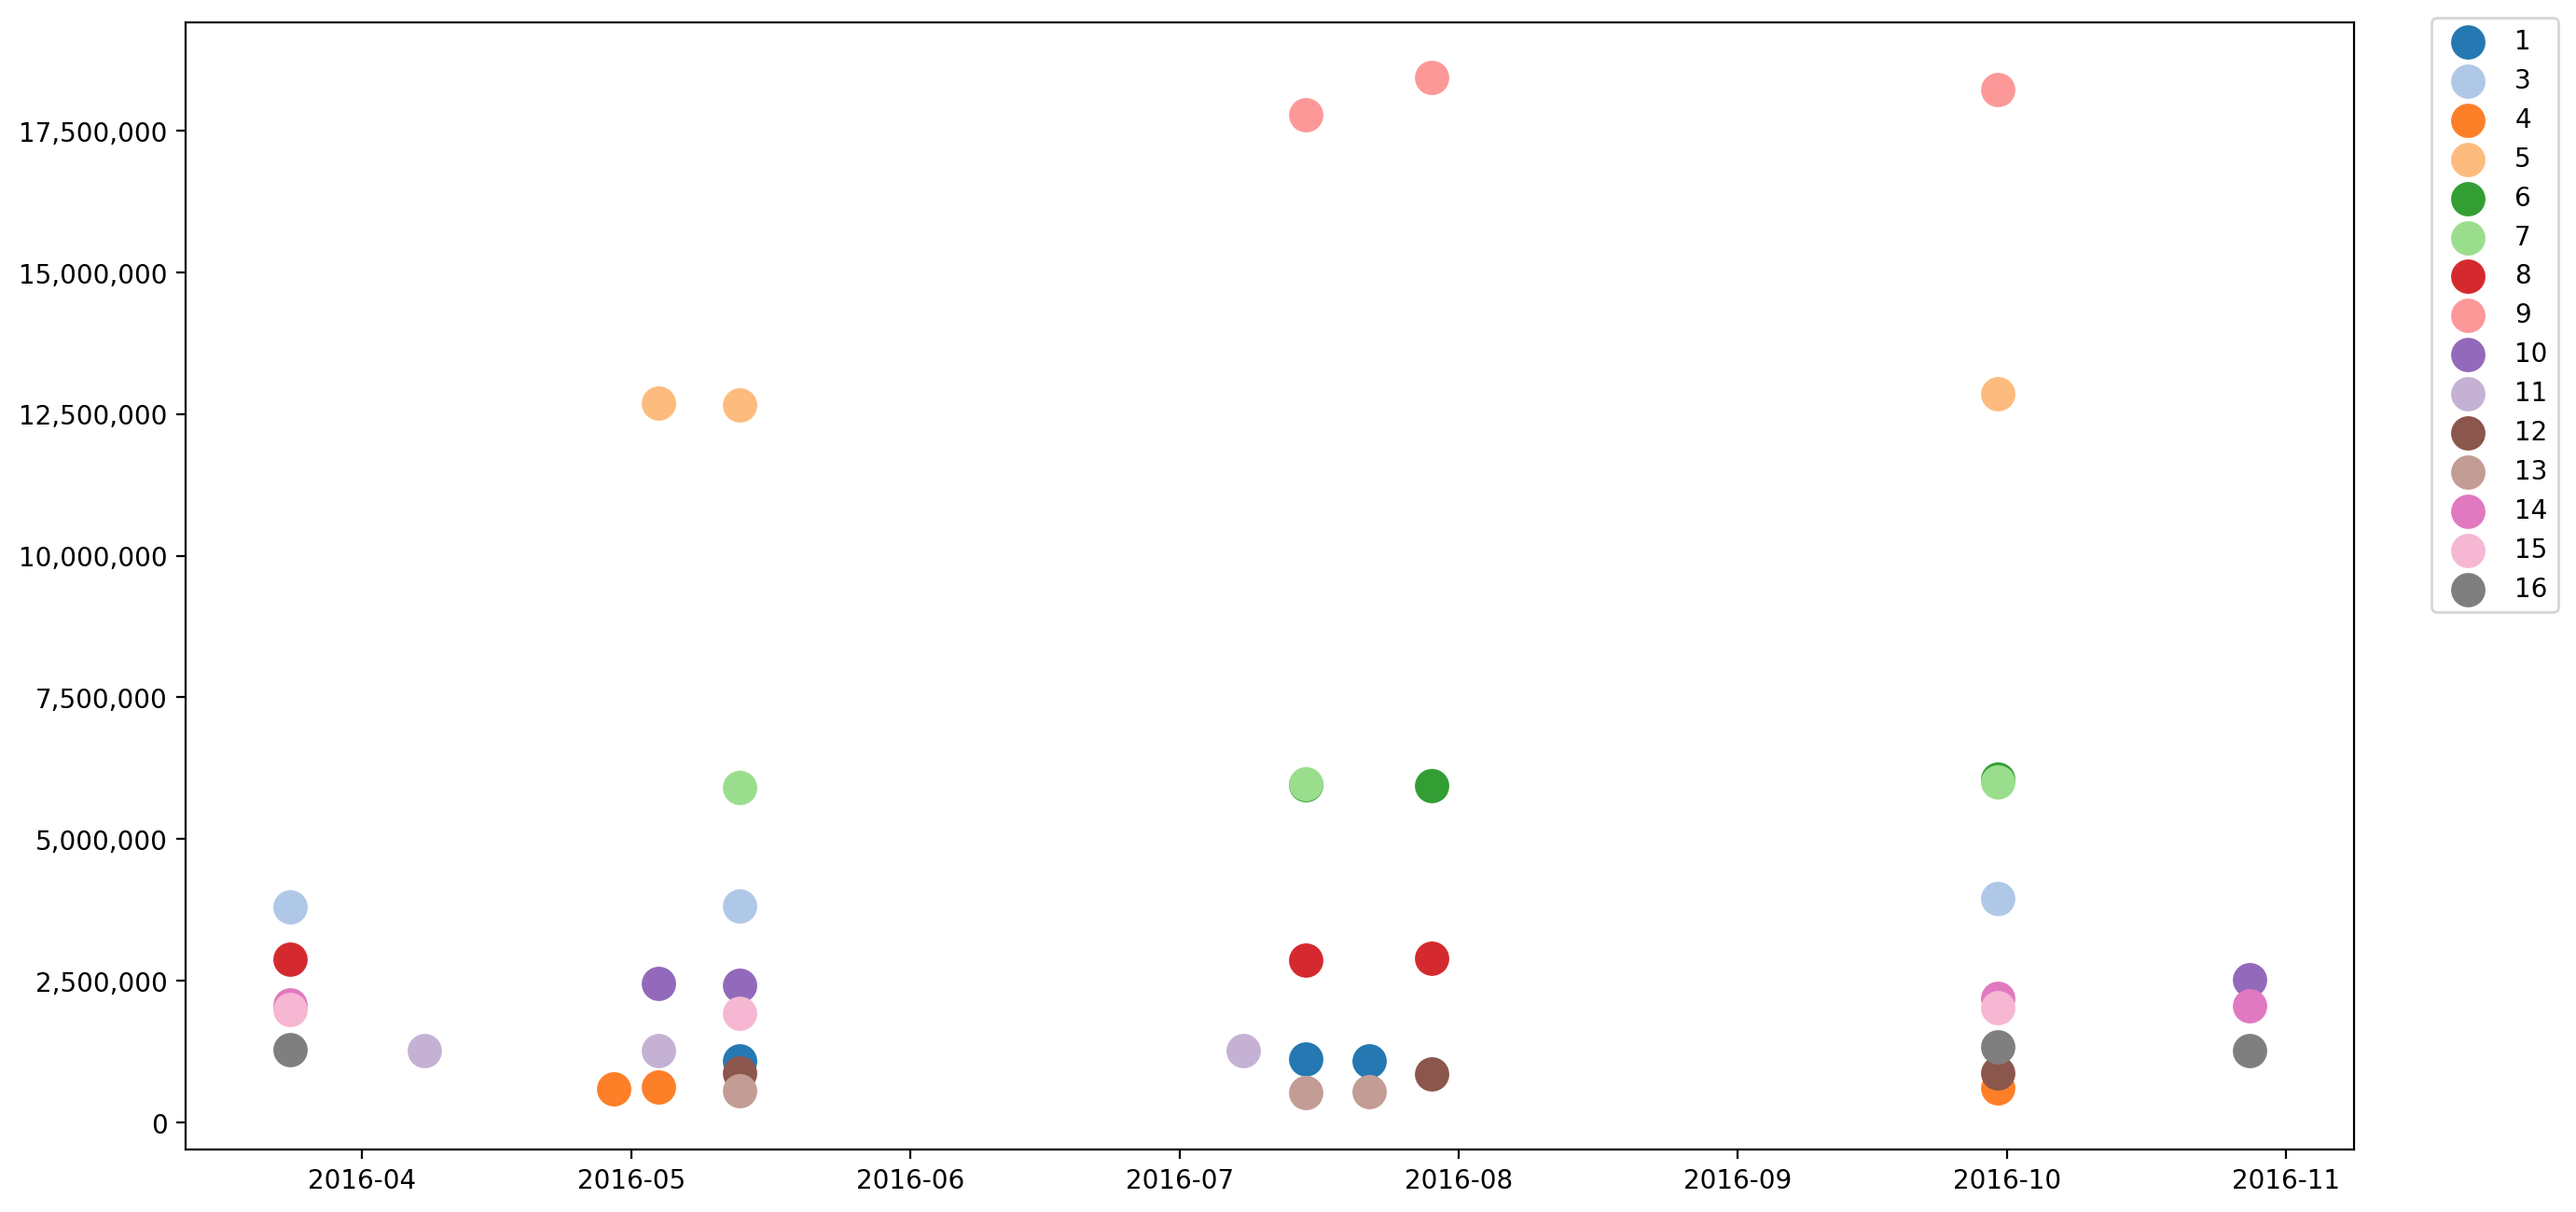

In [93]:
groups = df_clean.groupby('land')
scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    # line to insert here for to plot.
    ax.scatter(dates, group['sum'].values, s=150, c=next(scatter_colors), label=name)
    
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.015))
plt.show()

## Stacked area chart: Development of truck traffic on country roads
We take a look at the yearly data, which provides the aggregated numbers per year for each station. 

In [121]:
df_stacked = pd.read_csv('year_data.csv', sep=';')
df_stacked = df_stacked[df_stacked['str_cl'] != 'A']

grouped_by_land = df_stacked.groupby(['land'])

# Task 3: Stacked Plot the traffic on country roads

Using the dataframes produced in the above cell. The DataFrame is grouped by land, thus each land can be displayed as one layer in the chart.

You should create three arrays to generate the plot, years(x), areas to be stacked, labels for areas. These arrays are filled with data by iterating over the grouped_by_land object. 

These can be generated in a similar fashion as the above task in terms of code

In [122]:
x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
names = []
rows = []

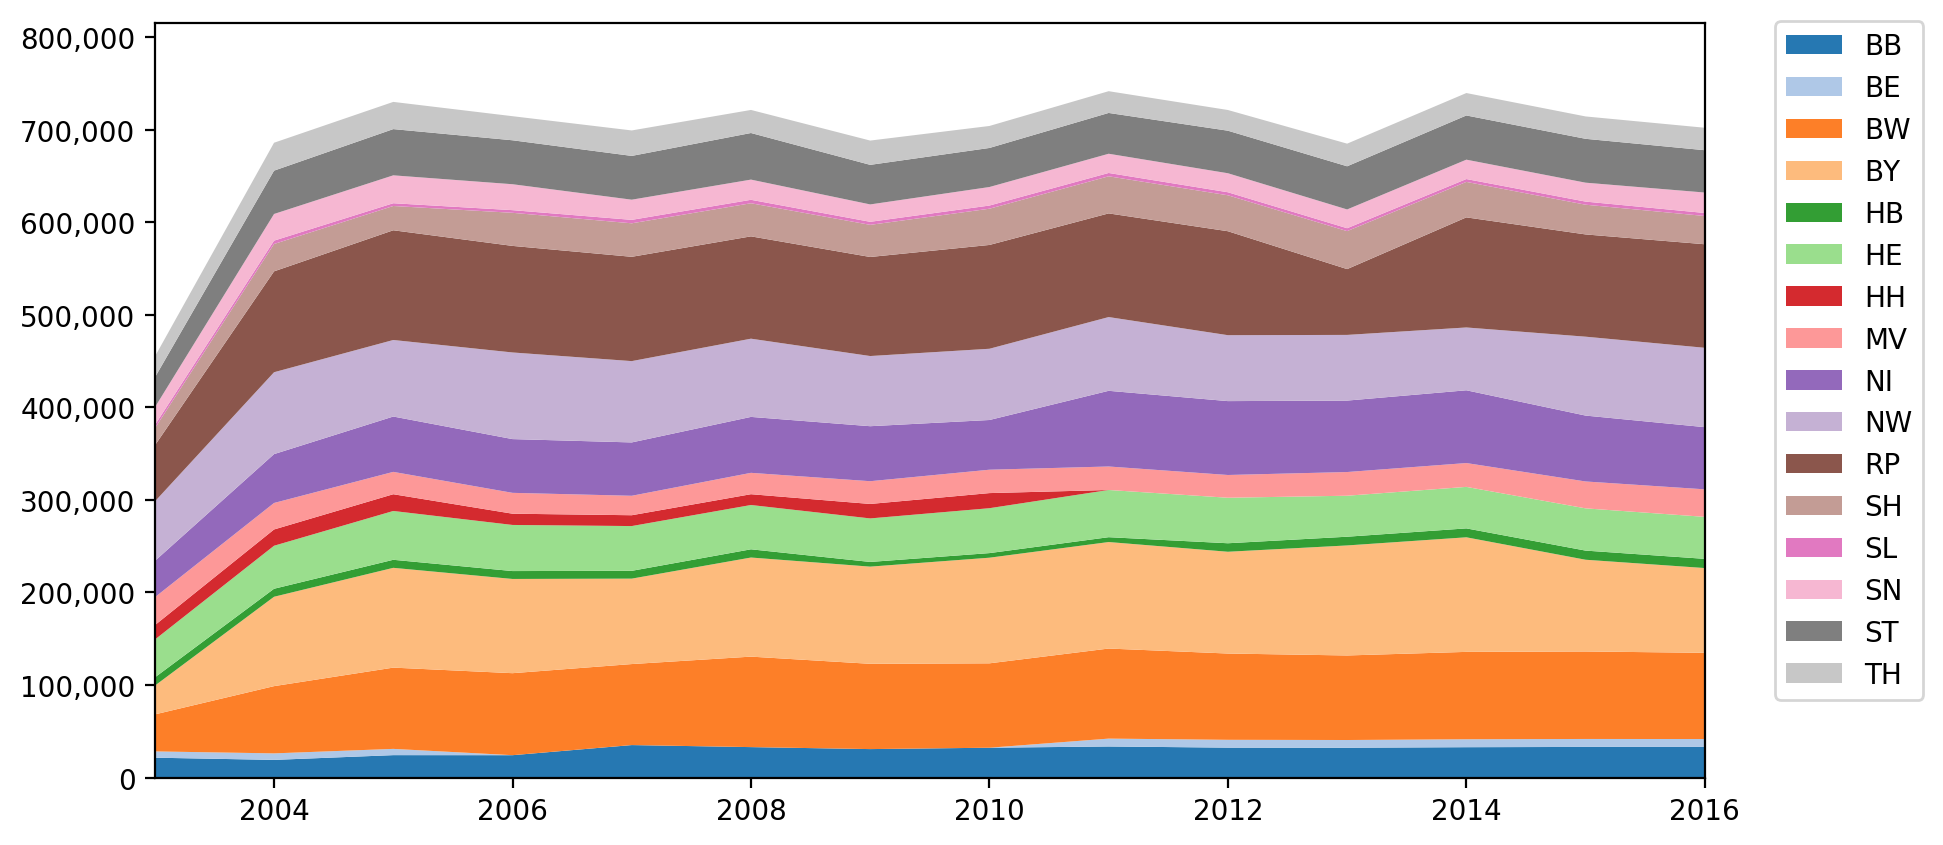

In [123]:
for name, land in grouped_by_land:
    group_by_year = land.groupby(['year'])['trucks_r1', 'trucks_r2'].sum()
    names.append(name)
    data = (group_by_year['trucks_r1'] + group_by_year['trucks_r2'])
    data = data.fillna(method='pad').values
    rows.append(data)

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.stackplot(x, rows, labels=names, colors=colors)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.02))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(0, 0.1)
plt.show()
